<a href="https://colab.research.google.com/github/AndhikaMS/MultiplicativeRNG/blob/main/AndhikaIF5A_Tugas_8_Pemodelan_Simulasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import numpy as np

a = 3  # Konstanta pengali
m = 67  # Modulus
Z0 = 13  # Seed (bilangan awal)
n = 21 # Jumlah bilangan acak yang akan dihasilkan

results = []  # Daftar kosong untuk menyimpan hasil per iterasi
Z = Z0        # Nilai awal (seed)
scramble = [] # Daftar untuk menyimpan scramble Rubik

notasi = ["U", "U'", "U2", "D", "D'", "D2",
         "R", "R'", "R2", "L", "L'", "L2",
          "F", "F'", "F2", "B", "B'", "B2"]

last_move = None  # Variabel untuk menyimpan gerakan sebelumnya

In [5]:
  for i in range(1, n + 1):
      Z_prev = Z                     # Menyimpan bilangan sebelumnya
      Z = (a * Z) % m                # Menghitung bilangan acak selanjutnya
      U = Z / m                      # Membagi hasil dengan modulus untuk menghasilkan bilangan acak seragam
      rumus = f"(3 * {Z_prev}) mod {m}"  # Membuat representasi rumus yang digunakan

      # Pilih gerakan berdasarkan bilangan acak, pastikan tidak sama dengan sebelumnya
      while True:
        move = notasi[Z % len(notasi)]
        group = move[0]  # Ambil sisi (U, D, R, L, F, B)
        if last_move is None or group != last_move[0]:  # Pastikan sisi berbeda
          break

        Z = (a * Z + 1) % m   # Modifikasi Z untuk menghindari kebuntuan

      scramble.append(move)          # Tambahkan gerakan ke daftar scramble
      last_move = move               # Perbarui gerakan terakhir
      results.append([i, Z_prev, rumus, Z, round(U, 3), move])  # Menyimpan hasil dalam daftar

In [6]:
print(f"{'i':<3} | {'Zi-1 (Bilangan Sebelumnya)':<28} | {'Rumus Zi = (3.Zi-1) mod 67':<32} | {'Zi (Bilangan Acak)':<20} | {'Ui = Zi/m (Bilangan Acak Seragam)':<30} | {'Move':<10}")
print("-" * 135)

for row in results:
    print(f"{row[0]:<3} | {row[1]:<28} | {row[2]:<32} | {row[3]:<20} | {row[4]:<33} | {row[5]:<10}")

# Tampilkan scramble akhir
print("\nScramble Rubik 3x3:")
print(" ".join(scramble))

i   | Zi-1 (Bilangan Sebelumnya)   | Rumus Zi = (3.Zi-1) mod 67       | Zi (Bilangan Acak)   | Ui = Zi/m (Bilangan Acak Seragam) | Move      
---------------------------------------------------------------------------------------------------------------------------------------
1   | 13                           | (3 * 13) mod 67                  | 39                   | 0.582                             | D         
2   | 39                           | (3 * 39) mod 67                  | 50                   | 0.746                             | F2        
3   | 50                           | (3 * 50) mod 67                  | 16                   | 0.239                             | B'        
4   | 16                           | (3 * 16) mod 67                  | 48                   | 0.716                             | F         
5   | 48                           | (3 * 48) mod 67                  | 10                   | 0.149                             | L'        
6   | 10    

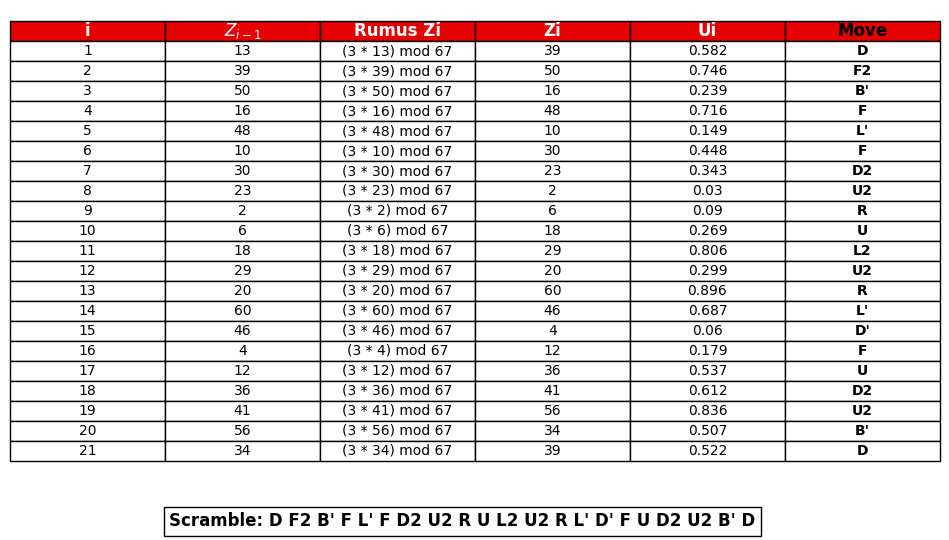

In [7]:
# Menyiapkan data untuk tabel
headers = ['i', '$Z_{i-1}$', 'Rumus Zi', 'Zi', 'Ui', 'Move']
table_data = [row for row in results]

# Membuat plot untuk menampilkan tabel
fig, ax = plt.subplots(figsize=(10, 6))  # Ukuran gambar

# Menyembunyikan axis karena kita hanya ingin menampilkan tabel
ax.axis('tight')
ax.axis('off')

# Membuat tabel menggunakan table_data
table = ax.table(cellText=table_data, colLabels=headers, loc='center', cellLoc='center', colColours=['#f7c6c6'] * len(headers))

# Styling tabel
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Pewarnaan: Set warna untuk baris dan kolom tertentu
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Baris header
        cell.set_fontsize(12)
        cell.set_text_props(weight='bold', color='white')  # Font putih dan bold
        cell.set_facecolor('#e60000')  # Background merah untuk header

    if j == 5:  # Untuk kolom "Move"
        cell.set_text_props(weight='bold', color='black')  # Bold dan hitam untuk gerakan

# Menambahkan teks scramble di bawah tabel
scramble_text = f"Scramble: {' '.join(scramble)}"
fig.text(0.5, 0.02, scramble_text, ha='center', fontsize=12, color='black', weight='bold', bbox=dict(facecolor='white', edgecolor='black'))

# Menampilkan gambar/tabel
plt.show()